# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Sería de utilidad contar con datos sobre:
- tipo de inmueble (terreno, construccion, vivienda, comercial, industrial, etc)
- ubicación y orientación
- condición del inmueble
- calidad de materiales (terminaciones)
- caracteristicas del inmueble
- superficie (terreno, cubierto)

*Este primer listado corresponde a algunas de las características principales de las diferentes propiedades, y en base a estas estará definido el precio. Es decir, una propiedad tipo "vivienda" probablemente cueste más que una tipo "terreno", pero puede suceder que un "terreno" en alguna ubicación particular tenga más valor que una "vivienda" en otra ubicación diferente.*

- condición legal
- condición catastral
- planos de la propiedad

*Este grupo de características también pueden influir en el precio del inmueble y aumentar el posible grupos de compradores. Por ejemplo, una propiedad que cumpla con estas características posiblemente esté en condiciones de poder ser adquirida por medio de un crédito hipotecario.*

- referencia de valores
- misma moneda de referencia con todos los valores

*Este tercer grupo de características nos va a ser de utilidad para poder comparar fácilmente una propiedad con otra.*


---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)


1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [10]:
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
print('Cantidad de Filas: ' + str(df.shape[0]))
print('Cantidad de Columnas: ' + str(df.shape[1]))
print('\n')
print('Primeras líneas del DataSet: ' + '\n')
print(df.head())
print('\n')
print('Últimas líneas del DataSet: ' + '\n')
print(df.tail())

Cantidad de Filas: 146660
Cantidad de Columnas: 19


Primeras líneas del DataSet: 

   start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [11]:
print('Resumen del Dataset:')
print(df.info())
print('\n')
print('Columnas del Dataset y sus valores faltantes')
print(df.isnull().sum())

Resumen del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

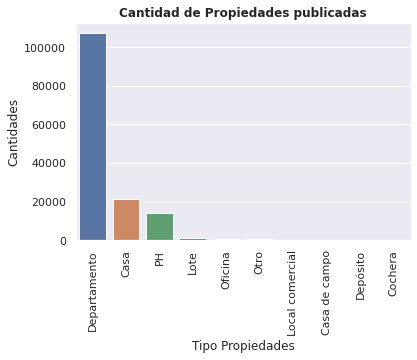

In [12]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
sns.countplot(data=df, x='property_type', order=df.property_type.value_counts().index)
plt.xlabel('Tipo Propiedades')
plt.ylabel('Cantidades')
plt.title('Cantidad de Propiedades publicadas', fontweight = "black")
plt.xticks(rotation=90)
plt.show()

*En el gráfico anterior hay un conjunto de Tipos de Propiedades que no se alcanza a apreciar la cantidad de anuncios ofrecidos.*
*Veamos una lista con valores:*

In [13]:
print(df.property_type.value_counts())

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


***Tipos de Propiedades:*** *si bien dentro del dataset existen varios tipos de propiedades, la gran mayoría de las publicaciones corresponde a "Departamentos", "Casas" y "PH".*

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

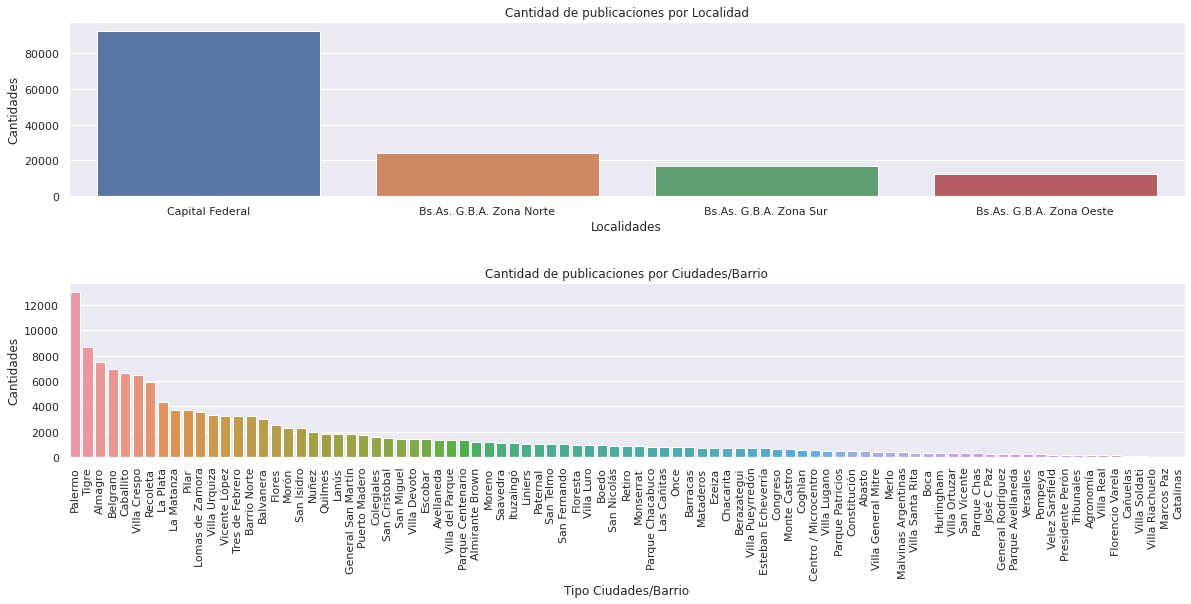

In [15]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
plt.figure(figsize=(20,8))

plt.subplot(2,1,1)
sns.countplot(data=df, x='l2', order=df.l2.value_counts().index)
plt.xlabel('Localidades')
plt.ylabel('Cantidades')
plt.title('Cantidad de publicaciones por Localidad')
#plt.xticks(rotation=90)

plt.subplot(2,1,2)
plt.subplots_adjust(hspace=0.5)
sns.countplot(data=df, x='l3', order=df.l3.value_counts().index)
plt.xlabel('Tipo Ciudades/Barrio')
plt.ylabel('Cantidades')
plt.title('Cantidad de publicaciones por Ciudades/Barrio')
plt.xticks(rotation=90)
plt.show()

***Regiones:*** *si bien dentro del dataset existen publicaciones para gran parte del Gran Buenos Aires, la zona de Capital Federal presenta la mayoría de anuncios, con el barrio de Palermo como el lugar donde más propiedades hay publicadas.*

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [17]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
df_r = df[((df.property_type == 'Departamento') | (df.property_type == 'Casa') | (df.property_type == 'PH')) & (df.l2 == 'Capital Federal')]
df_r.reset_index(drop=True)
#print(df_r.head(15))
print('Dataset filtrado: ' + str(df_r.shape))

Dataset filtrado: (91485, 19)


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [18]:
print(df_r[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].describe())

              rooms      bedrooms     bathrooms  surface_total  \
count  91485.000000  91485.000000  89314.000000   82568.000000   
mean       2.964278      1.960278      1.560147     112.626369   
std        1.314704      1.072946      0.860309     980.713664   
min        1.000000      0.000000      1.000000      10.000000   
25%        2.000000      1.000000      1.000000      49.000000   
50%        3.000000      2.000000      1.000000      71.000000   
75%        4.000000      3.000000      2.000000     111.000000   
max       26.000000     15.000000     14.000000  126062.000000   

       surface_covered         price  
count     82250.000000  9.148500e+04  
mean         94.966310  2.595003e+05  
std         778.515243  3.222654e+05  
min           1.000000  6.000000e+03  
25%          44.000000  1.200000e+05  
50%          63.000000  1.750000e+05  
75%          96.000000  2.790000e+05  
max      126062.000000  3.243423e+07  


*Analizando las estadísticas obtenidas:*
- *algunas instancias están con valores faltantes.*
- *para las 6 variables los valores "max" son muy extremos, puede ser que no tenga sentido considerarlos.*
- *para valores "min" en las variables surface_total, surface_covered son algo extremos, puede ser que no tenga sentido considerarlos.*
- *para rooms, bedrooms y bathrooms: la dispersión de valores es más acotada. Aparte su media y mediana están muy cercanas*
- *para surface_total, surface_covered y price: la dispersión de valores es muy alta. Su media y mediana difieren mucho, seguramente su distribución presenta algún sesgo.*

*Veamos algunos gráficos rapidos para tener mejor idea de los datos y sus dispersiones*


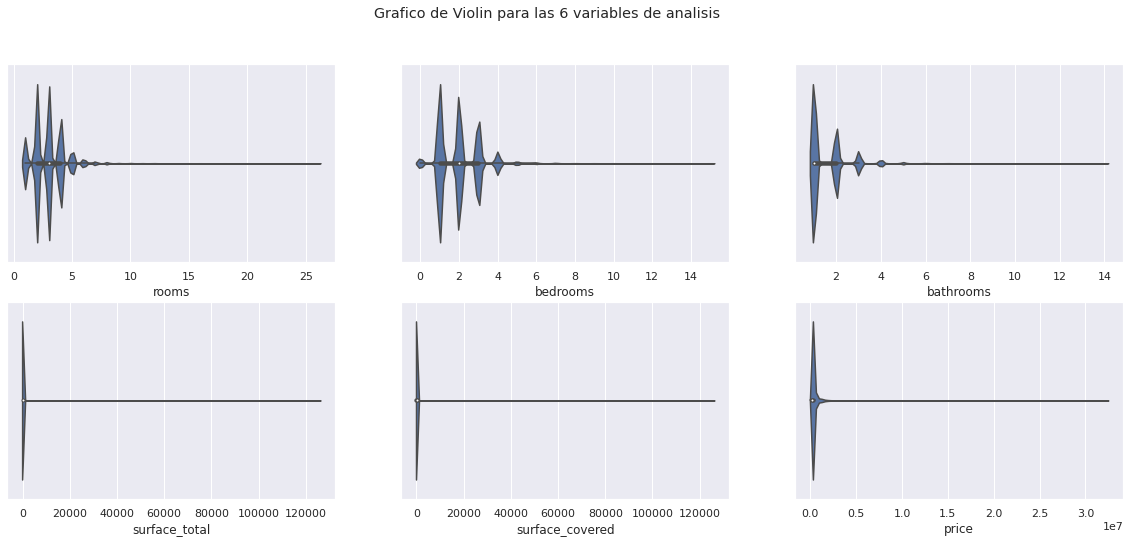

In [19]:
plt.figure(figsize=(20,8))

plt.subplot(2,3,1)
sns.violinplot(data=df_r, x='rooms')
plt.subplot(2,3,2)
sns.violinplot(data=df_r, x='bedrooms')
plt.subplot(2,3,3)
sns.violinplot(data=df_r, x='bathrooms')
plt.subplot(2,3,4)
sns.violinplot(data=df_r, x='surface_total')
plt.subplot(2,3,5)
sns.violinplot(data=df_r, x='surface_covered')
plt.subplot(2,3,6)
sns.violinplot(data=df_r, x='price')

plt.suptitle('Grafico de Violin para las 6 variables de analisis')
plt.show()

*Para todas las variables se pueden observar valores muy extremos.*  
*Para el caso de habitaciones (`rooms`, `bedrooms`, `bathrooms`) tiene sentido encontrar una distribución alrededor de algunos valores puntuales, por ser de naturaleza discreta (es decir, en un Departamento podemos tener 1 o 2 habitaciones, no vamos a encontrarnos con 1,5 habitaciones).*  
*Para el caso de las superficies (`surface_total`, `surface_covered`) y el precio (`price`), notamos muchos valores extremos, generando una alta dispersión, haciendo que no sea muy interpretable los gráficos.*

*Antes de profundizar en los gráficos, veamos que sucede con nuestro dataset si:*
- *eliminamos las filas con datos faltantes, según las columnas de interés*
- *aplicamos el filtro que la superficie cubierta (`surface_covered`) no puede ser mayor a la superficie total (`surface_total`)*

In [20]:
print('Nuestro set de datos cuanta con un tamanio de ' + str(df_r.shape) + ' filas por columnas respectivamente')

df_r_f = df_r.dropna(axis=0, subset = ["bathrooms", "surface_total", "surface_covered"])
df_r_f = df_r_f[(df_r_f.surface_total >= df_r_f.surface_covered)]

print('Nuestro set de datos luego de filtrar el tamanio paso a ser de ' + str(df_r_f.shape) + ' filas por columnas respectivamente')
print('\n')

Nuestro set de datos cuanta con un tamanio de (91485, 19) filas por columnas respectivamente
Nuestro set de datos luego de filtrar el tamanio paso a ser de (80458, 19) filas por columnas respectivamente




*Hagamos un análisis particular para las 3 variables (`surface_total`, `surface_covered` y `price`) que no pudimos analizar anteriormente.*  
*Empecemos con la varialbe `surface_total`:*

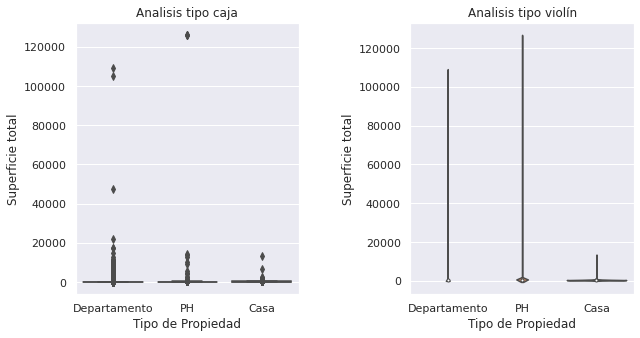

In [24]:

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(data=df_r_f, x='property_type', y='surface_total')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Superficie total')
plt.title('Analisis tipo caja')

plt.subplot(1,2,2)
sns.violinplot(data=df_r_f, x='property_type', y='surface_total')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Superficie total')
plt.title('Analisis tipo violín')

plt.subplots_adjust(wspace=0.5)


*Aún luego del filtrado seguimos teniendo valores extremos, se dificulta mucho el análisis.*  
*Realicemos un recorte de valores extremos, utilizando el rango intercuartílico, veamos cuantas muestran quedan en el análisis, y volvamos a mostrar los mismos gráficos.*


In [22]:
mínimo = df_r_f.quantile (0.25) 
máximo = df_r_f.quantile (0.75)
IQR = máximo - mínimo 

df_iqr = df_r_f[~ ((df_r_f < (mínimo - 1.5 * IQR)) | (df_r_f > (máximo + 1.5 * IQR))).any(axis=1)]

print('Pasamos de un data set de tamaño ' + str(df_r_f.shape) + ' (filas por columnas respectivamente), a uno de tamaño ' + str(df_iqr.shape))
print('\n')

Pasamos de un data set de tamaño (80458, 19) (filas por columnas respectivamente), a uno de tamaño (68748, 19)




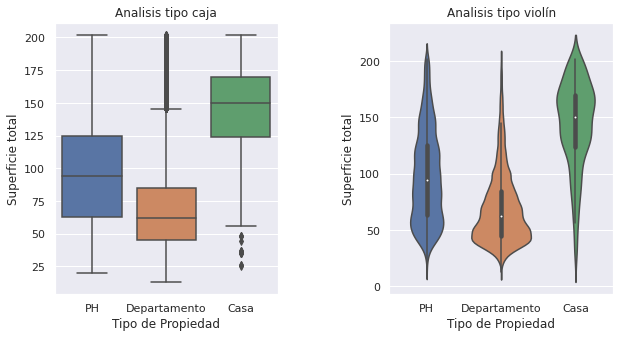

In [25]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(data=df_iqr, x='property_type', y='surface_total')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Superficie total')
plt.title('Analisis tipo caja')

plt.subplot(1,2,2)
sns.violinplot(data=df_iqr, x='property_type', y='surface_total')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Superficie total')
plt.title('Analisis tipo violín')

plt.subplots_adjust(wspace=0.5)

*Ahora sí son mucho mejor interpretables los gráficos!*  
*Se puede observar que:*
- *como era esperable, las propiedades con menor superficie total son los Departamentos, con una alta concentración propiedades de este estilo cercana a los 50m2*
- *para el caso de PH vemos una distribución mucho menos concentrada, y más plana a lo largo de todo el intervalo elegido*
- *para el caso de Casas, como era de esperar, son las propiedades que más superficie total tienen, su distribución está más concentrada a partir de los 125m2 aproximadamente. Probablemente se podría haber considerado un límite superior mayor al momento de filtrar*

*Hagamos un análisis ahora para la variable `surface_covered`:*

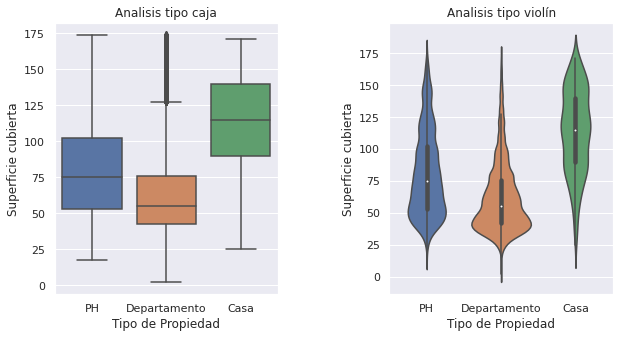

In [26]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(data=df_iqr, x='property_type', y='surface_covered')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Superficie cubierta')
plt.title('Analisis tipo caja')

plt.subplot(1,2,2)
sns.violinplot(data=df_iqr, x='property_type', y='surface_covered')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Superficie cubierta')
plt.title('Analisis tipo violín')

plt.subplots_adjust(wspace=0.5)

*Se observan unos gráficos muy parecidos a los analizados sobre la superficie total.*  
*Es para destacar que para las propiedades tipo Casas los valores están menos concentrado, presenta una distribución más plana.*


*Veamos que sucede con la variable `price`:*

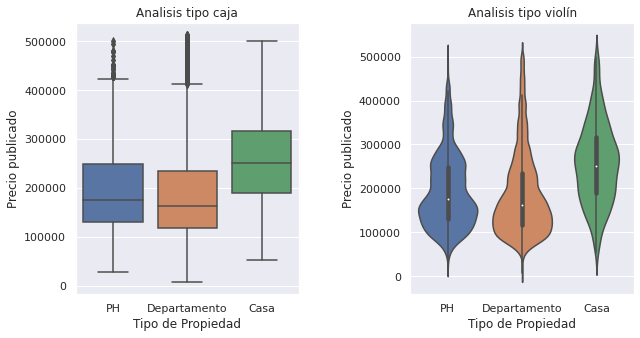

In [27]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(data=df_iqr, x='property_type', y='price')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio publicado')
plt.title('Analisis tipo caja')

plt.subplot(1,2,2)
sns.violinplot(data=df_iqr, x='property_type', y='price')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio publicado')
plt.title('Analisis tipo violín')

plt.subplots_adjust(wspace=0.5)

*Se destaca como el precio de los PH y Departamentos es muy similar, tanto en sus valores mínimos, máximos y medios, como en su distribución.*  
*Para las propiedades tipo Casa su valor es más elevado, y su distribución es algo más plana en comparación con las otras dos.*


*Ahora que tenemos el dataset filtrado veamos cómo se relacionan las diferentes variables de interés*

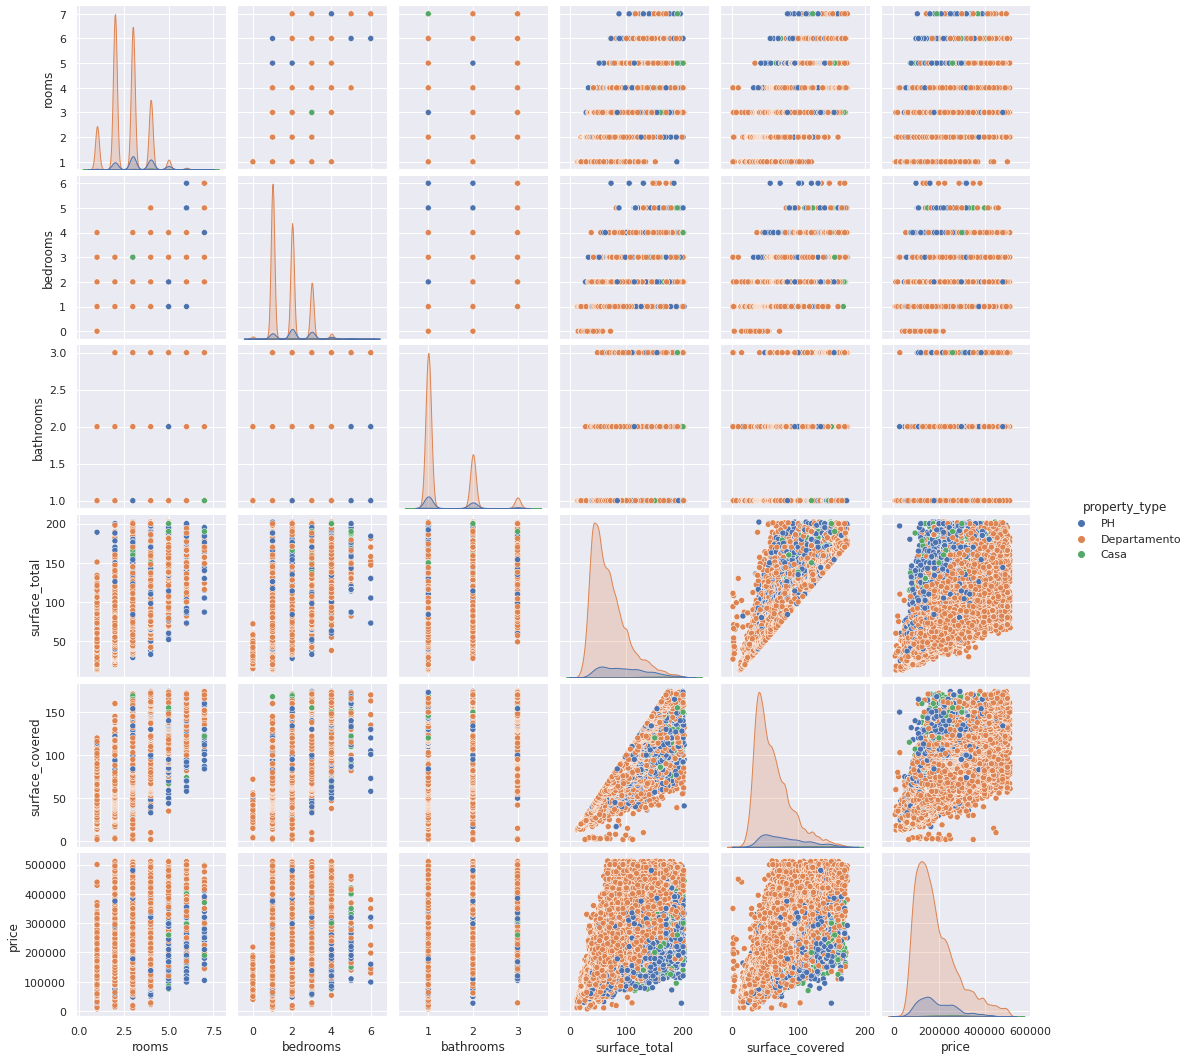

In [28]:
df_pairplot = df_iqr[['property_type', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
sns.pairplot(df_pairplot, hue = "property_type")

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

*Veamos la correlación de las variables:*

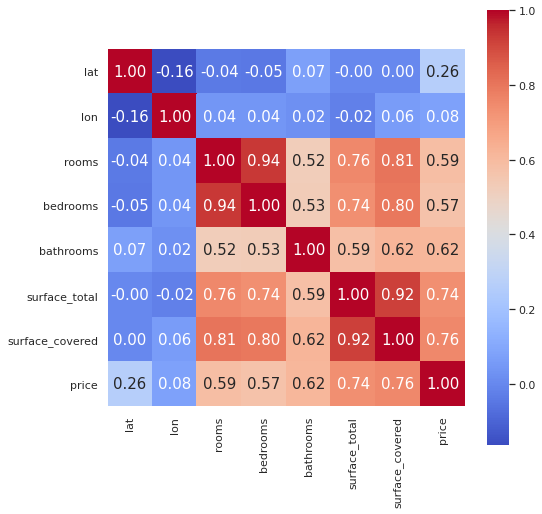

In [29]:
corr = df_iqr.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True, square = True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

*Del gráfico anterior, se puede apreciar claramente una zona de color más
 "caliente" en la correlación de variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`.*  
*Es para destacar que la variable `bathrooms` es la que menor nivel de correlación tiene, en comparación con las otras 5.*  
*Además, es para destacar que la variable `precio` correlaciona mucho más con las variables de superficie (`surface_total` y `surface_covered`), en comparación con las variables de espacios (`rooms`, `bedrooms` y `bathrooms`).*  
*También se puede observar que las variables que mejor correlación tienen son `rooms` vs `bedrooms`, y `surface_total` vs `surface_covered`. Tiene sentido que esto suceda.*


*Haciendo un análisis por Tipo de Propiedad:*

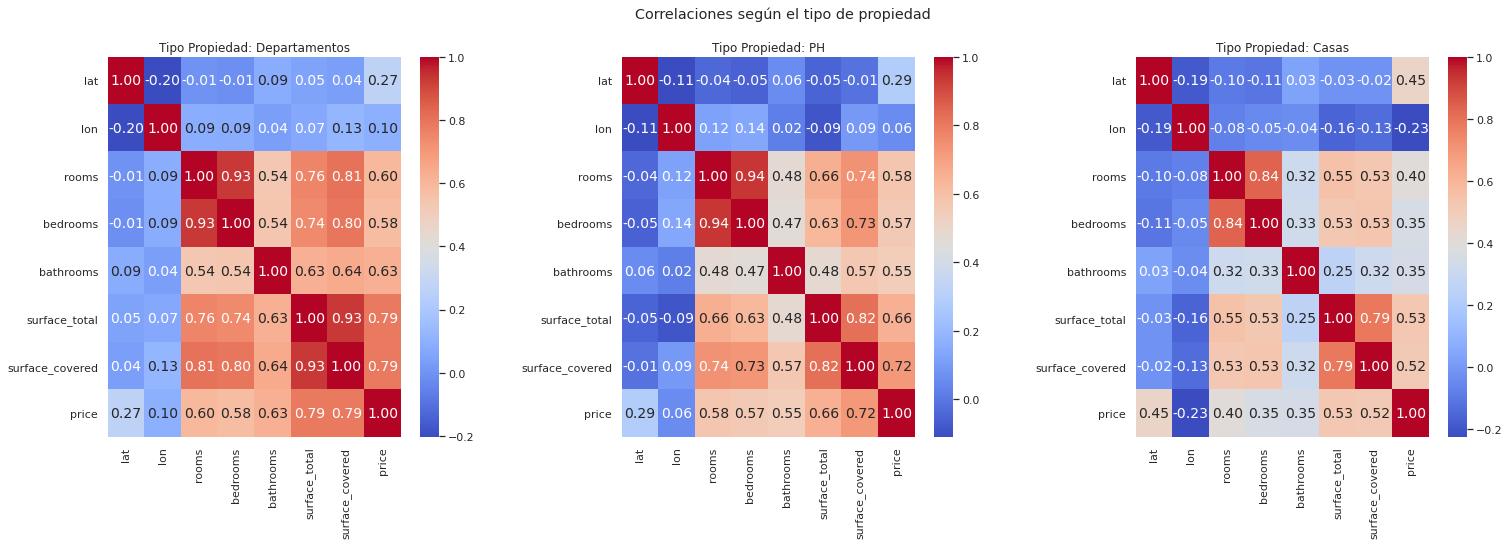

In [33]:
corr_casa = df_iqr[df_iqr.property_type == "Casa"].corr()
corr_depto = df_iqr[df_iqr.property_type == "Departamento"].corr()
corr_ph = df_iqr[df_iqr.property_type == "PH"].corr()

plt.figure(figsize=(25,7))
plt.suptitle("Correlaciones según el tipo de propiedad")

plt.subplot(1,3,1)
sns.heatmap(corr_depto, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 14}, cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.title("Tipo Propiedad: Departamentos")

plt.subplot(1,3,2)
sns.heatmap(corr_ph, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 14}, cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.title("Tipo Propiedad: PH")

plt.subplot(1,3,3)
sns.heatmap(corr_casa, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 14}, cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.title("Tipo Propiedad: Casas")

plt.subplots_adjust(wspace=0.4)

*Al realizar el análisis según los tipos de propiedades, encontramos:*
- *para Departamentos el comportamiento es muy similar al gráfico general anterior. Se observa una correlación menor de la variable `bathrooms` en comparación a las demás, y el precio correlaciona mejor con las superficies (`surface_total` y `surface_covered`)*
- *para PH los niveles de correlación en general son algo menores, pero se mantiene el mismo comportamiento que el gráfico general*
- *para Casas los niveles de correlación caen bastante, si bien se mantiene el mismo comportamiento que el gráfico general, todos los niveles de correlación están muy atenuados. Algo característico es el aumento de la corrosión `price` vs `lat`*


### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


*Para esta instancia tomemos el dataset original, y filtremos:*
- *considerar los 3 tipos de propiedades con más publicaciones*
- *la localidad con mayor cantidad de publicaciones*
- *quitar valores nulos*
- *considerar propiedades donde la superficie cubierta no sea mayor a la superficie total*  
  
*Adicionalmente:*
- *agregaremos una columna más con el valor de metro cuadrado de cada publicación*
- *agregamos una columna más con el valor de cada ambiente para cada una de la publicaciones*


In [34]:
df_d = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
#print(df_d.shape)

# Seleccionamos publicaciones del tipo "Departamento", "Casa" y "PH", que esten en "Capital Federal"
df_d = df_d[((df_d.property_type == 'Departamento') | (df_d.property_type == 'Casa') | (df_d.property_type == 'PH')) & (df_d.l2 == 'Capital Federal')]
#print(df_d_r.shape)

# Eliminamos valores nulo del dataset
df_d = df_d.dropna()
#print(df_d_r.shape)

# Seleccionamos propiedades donde la superficie cubierta no supero la superficie total
df_d = df_d[(df_d.surface_total >= df_d.surface_covered)].reset_index(drop=True)
#print(df_d.shape)

# Sumamos una columna con el valor del m2
df_d['$m2'] = df_d.price / df_d.surface_total

# Sumamos una columna con el valor de cada ambiente
df_d['$rooms'] = df_d.price / df_d.rooms

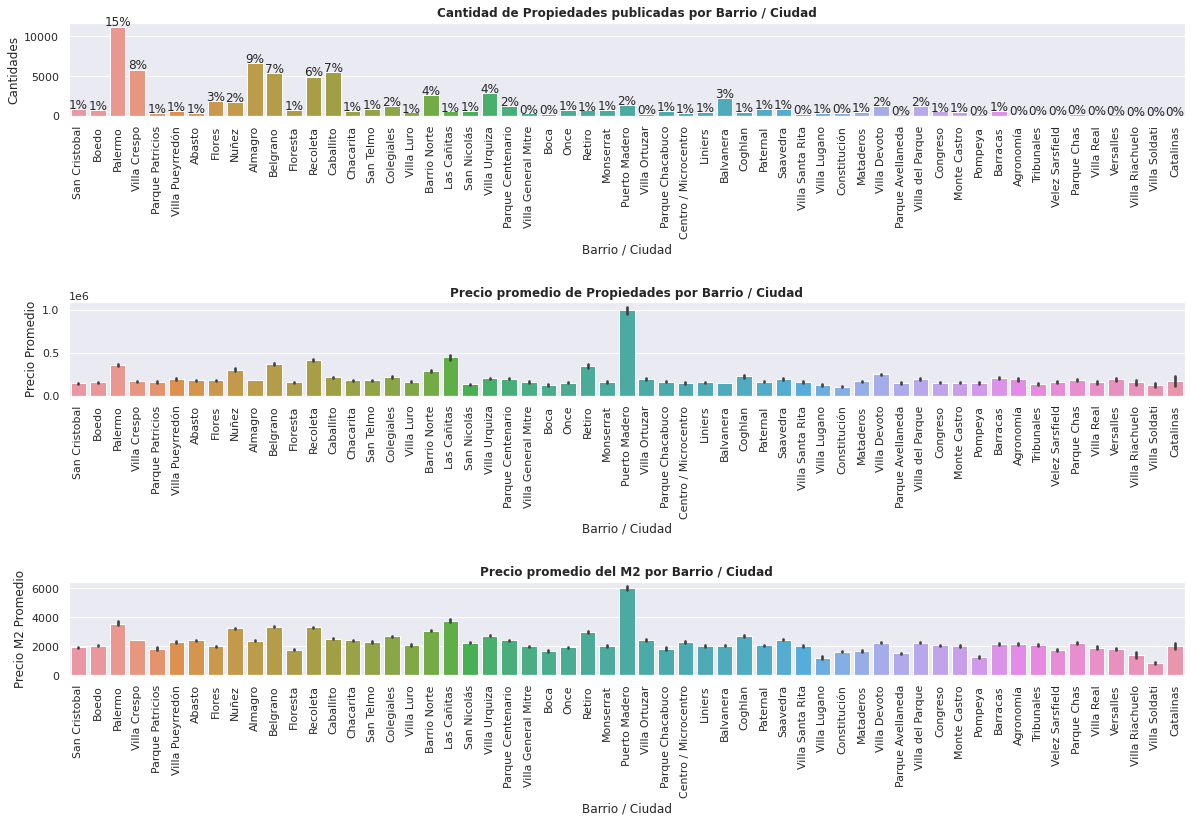

In [35]:
plt.figure(figsize=(20,12))

plt.subplot(3,1,1)
ax = sns.countplot(data=df_d, x='l3')
plt.xlabel('Barrio / Ciudad')
plt.ylabel('Cantidades')
plt.title('Cantidad de Propiedades publicadas por Barrio / Ciudad', fontweight = "black")
plt.xticks(rotation=90)

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height_por = p.get_height()/df_d.l3.count()
    height_y = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height_por:.0%}', (x + width/2, y + height_y*1.02), ha='center')

plt.subplot(3,1,2)
sns.barplot(data=df_d, x='l3', y='price')
plt.xlabel('Barrio / Ciudad')
plt.ylabel('Precio Promedio')
plt.title('Precio promedio de Propiedades por Barrio / Ciudad', fontweight = "black")
plt.xticks(rotation=90)

plt.subplot(3,1,3)
sns.barplot(data=df_d, x='l3', y='$m2')
plt.xlabel('Barrio / Ciudad')
plt.ylabel('Precio M2 Promedio')
plt.title('Precio promedio del M2 por Barrio / Ciudad', fontweight = "black")
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=2)

plt.show()


*Se destaca que:*
- *el Barrio con mayor cantidad de publicaciones es el de Palermo, sin embargo, en promedio no es una zona de las más caras*
- *el Barrio de Puerto Madero, con muy poquitas publicaciones, es el lugar donde están las propiedades con mayor valor.*
- *los Barrios con propiedades más caras, también tienen el valor del m2 más caro, como era de esperar*
   
*En conclusión, el Barrio donde está la propiedad incide mucho en el Precio de la misma.*  
*Además, los Barrios con mayor cantidad de publicaciones, no son propiedades de las más caras.*


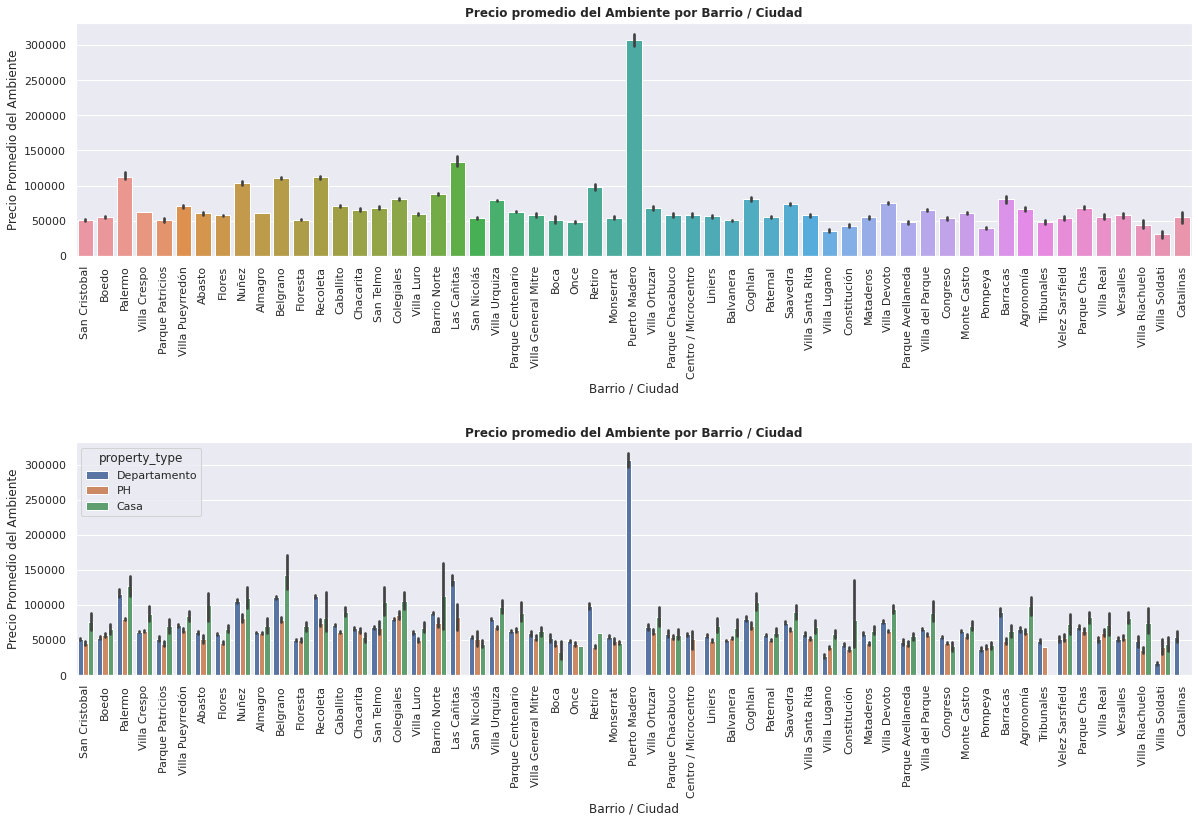

'\nax = sns.catplot(data=df_d, x=\'l3\', y=\'$rooms\', col=\'property_type\', kind="bar")\nax.set_axis_labels(\'Barrio / Ciudad\', \'Precio por Ambiente\')\nplt.subplots_adjust(top=0.9)\nax.fig.suptitle(\'Precio promedio del Ambiente por Barrio / Ciudad\', fontweight = "black")\nax.set_titles("{col_name}")\nax.set_xticklabels(rotation=90)\n\nplt.show()\n'

In [36]:
plt.figure(figsize=(20,12))

plt.subplot(2,1,1)
sns.barplot(data=df_d, x='l3', y='$rooms')
plt.xlabel('Barrio / Ciudad')
plt.ylabel('Precio Promedio del Ambiente')
plt.title('Precio promedio del Ambiente por Barrio / Ciudad', fontweight = "black")
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.barplot(data=df_d, x='l3', y='$rooms', hue='property_type')
plt.xlabel('Barrio / Ciudad')
plt.ylabel('Precio Promedio del Ambiente')
plt.title('Precio promedio del Ambiente por Barrio / Ciudad', fontweight = "black")
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.8)

plt.show()
'''
ax = sns.catplot(data=df_d, x='l3', y='$rooms', col='property_type', kind="bar")
ax.set_axis_labels('Barrio / Ciudad', 'Precio por Ambiente')
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Precio promedio del Ambiente por Barrio / Ciudad', fontweight = "black")
ax.set_titles("{col_name}")
ax.set_xticklabels(rotation=90)

plt.show()
'''


*Del gráfico podemos analizar la incidencia de los ambientes en el precio, vemos que:*
- *el Barrio de Puerto Madero el valor por Ambiente es muy elevado, y el único tipo de propiedad publicado son Departamentos*
- *en algunos Barrios como Palermo o Belgrano, el precio por Ambiente es un término medio, pero se observa que en propiedades tipo Casa el precio promedio del Ambiente es mayor*
- *existen algunos lugares como Tribunales, Catalinas, o Las Cañitas, donde no hay publicaciones de Casas*  

*Podemos decir que el precio por Ambiente respeta los gráficos analizados anteriormente, es decir, el precio por Ambiente dependerá del Barrio de la propiedad.*  
*Adicionalmente, no todos los Barrios tienen todos los tipos de propiedades.*


## 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [3]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
df_m = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
#print(df_d.shape)

# Seleccionamos publicaciones del tipo "Departamento", "Casa" y "PH", que esten en "Capital Federal"
df_m = df_m[((df_m.property_type == 'Departamento') | (df_m.property_type == 'Casa') | (df_m.property_type == 'PH')) & (df_m.l2 == 'Capital Federal')]
#print(df_m.shape)

# Seleccionamos propiedades donde: 15 < superficie total < 1000
df_m = df_m[(df_m.surface_total >= 15) & (df_m.surface_total <= 1000)]
#print(df_m.shape)

# Seleccionamos propiedades donde: precio < 4000000
df_m = df_m[(df_m.price <= 4000000)]
#print(df_m.shape)

# Elegimos solo 6 columnas del dataset
df_m = df_m[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]]

# Eliminamos valores nulo del dataset
df_m = df_m.dropna().reset_index(drop=True)

print(df_m.shape)

(81019, 6)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#from sklearn.metrics import mean_squared_log_error

***Benchamark***  

*Como modelo base se tomó uno generado con anterioridad. Años antes el cuerpo de Tasadores de Properati ya habían tenido un acercamiento con modelos de Machine Learning, y contaban con un modelo que los ayudaba con su trabajo.*  

*Analizando el dataset y el modelo tenemos:*
- *se consideran propiedades del tipo Departamento, PH y Casas, de Capital Federal*
- *el dataset cuenta con 5 columnas: "habitaciones", "dormitorios", "Barrio", "Tipo Propiedad", "Precio"*
- *se transformaron 2 variables categóricas ("Barrio" y "Tipo Propiedad") a numérica y se agregaron al dataset*
- *se utiliza la Raíz del Error Cuadrático Medio (RMSE), junto con R Cuadrado (R2) como criterio de evaluación*
- *se utiliza un modelo de Regresión lineal*


In [39]:
df_bench = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
df_bench = df_bench[((df_bench.property_type == 'Departamento') | (df_bench.property_type == 'Casa') | (df_bench.property_type == 'PH')) & (df_bench.l2 == 'Capital Federal')]
df_bench = df_bench[["rooms", "bedrooms", "l3", "property_type", "price"]]
df_bench = df_bench.dropna().reset_index(drop=True)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_bench['l3_num'] = label_encoder.fit_transform(df_bench.l3)
df_bench['property_type_num'] = label_encoder.fit_transform(df_bench.property_type)
#print(df_bench.head(10))

print(df_bench.shape)

(91485, 7)


In [40]:
X_b = df_bench[["rooms", "bedrooms", "l3_num", "property_type_num"]]
y_b = df_bench[['price']]

X_train, X_test, y_train, y_test = train_test_split(X_b, y_b, test_size = 0.3, random_state = 42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
#print(linear_model.coef_, linear_model.intercept_)

y_test_pred = linear_model.predict(X_test)
y_train_pred = linear_model.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
print('\n')
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'Error R Cuadrado en Train: {r2_train}')
print(f'Error R Cuadrado en Test: {r2_test}')

Raíz del error cuadrático medio en Train: 293997.4470124745
Raíz del error cuadrático medio en Test: 268579.7740368071


Error R Cuadrado en Train: 0.20128525012364173
Error R Cuadrado en Test: 0.22991743372379647


/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


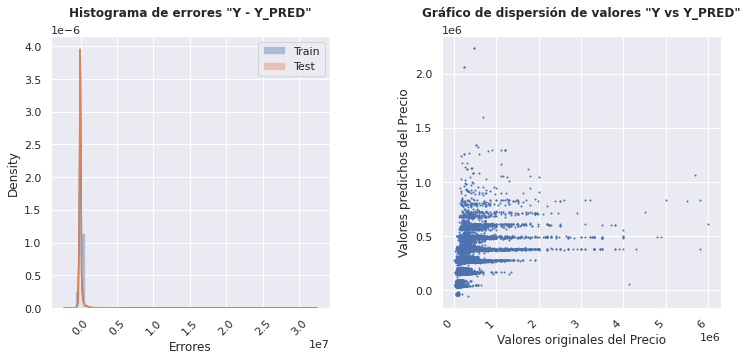

In [41]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 50, label = 'Train')
sns.distplot(y_test - y_test_pred, bins = 50, label = 'Test')
plt.xlabel("Errores", fontsize = 12)
plt.xticks(rotation = 45)
plt.legend()
plt.title('Histograma de errores "Y - Y_PRED"', fontweight = "black", y=1.05)

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred, s=1) 
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("Valores originales del Precio", fontsize = 12)
plt.ylabel("Valores predichos del Precio", fontsize = 12)
plt.title('Gráfico de dispersión de valores "Y vs Y_PRED"', fontweight = "black", y=1.05)

plt.subplots_adjust(wspace=0.4)

plt.show()

*Como conclusiones:*
- *no es un modelo demasiado robusto*
- *la dispersión de valores en el error "Y - Y_PRED" es significativa, y no es una gráfica simétrica con centro en 0*
- *se observa que los valores de "Y vs Y_PRED" están bastante alejados de la diagonal*
- *el error R Cuadrado nos muestra que el modelo no se ajusta muy bien a nuestra variable Precio*


***Nuestro análisis***  
*Antes de profundizar con el análisis, repasemos las métricas de evaluación elegidas, son 2:*
- *Raíz del Error Medio Cuadrado (RMSE)*
- *R Cuadrado (R2)*

*Nuestro desafío se trata de generar un modelo que ayude a predecir el precio de una determinada propiedad. Para este tipo de predicciones hacemos usos de modelos regresores.*  
*Ambas métricas elegidas son utilizadas para evaluar estos modelos, y la idea de evaluación consiste en determinar cuánta diferencia hay entre el valor predicho y el valor real de esa variable en el dataset de entrenamiento/testeo.*  

*Entonces:*
- *RMSE: se trata de un valor que nos da una idea de la magnitud del error, y en particular, por su definición matemática, su valor estará más afectado por los errores (valor_real - valor_predicho) grandes.*
- *R2: nos entregará una proporción (estrictamente hablando calcula el Coeficiente de Determinación) el cual nos ofrece una valor que nos ayuda a entender cuán bien el modelo se ajusta.*

*Para el caso de RMSE, se busca que la magnitud de este error sea lo más baja posible (igual a 0 significa que no hay error, un modelo perfecto, overfitting(?)). Sin embargo, el valor que toma RMSE puede ser muy grande, y esto no está del todo mal. Es decir, si la variable que intentamos predecir se mueve en un rango acotado (poca dispersión de valores) entonces el RMSE también puede tomar valores más acotados. Por otro lado, si la variable a predecir se mueve en un gran rango de valores (mucha dispersión), entonces el valor RMSE puede también tomar una magnitud importante.*  
*Del análisis Exploratorio que realizamos, la variable a predecir (`price`) tiene una desviación estándar de 322265.4, es decir una muy alta dispersión de valores, por lo cual es probable que RMSE también sea elevado.*  

*Para tener un mejor entendimiento de cuán bien está funcionando nuestro modelo, aparte del valor RMSE, utilizamos la métrica R2, la cual nos ayudará a entender cuán bien se está ajustando nuestro modelo, independientemente de la magnitud del error. Cuanto más cerca a 1 este R2 mejor ajustara nuestro modelo, cuanto más cerca de 0 (incluso puede tomar un valor negativo) peor estará ajustando el modelo.*


*Comencemos con el estudio:*
- *tomando nuestro dataset previamente filtrado por completo*
- *realizar una división  de nuestro dataset para entrenamiento y testeo*
- *generar un modelo regresor de de Árbol de Decisión (de profundidad 3) y otro de Vecinos más Cercanos (considerando 5 vecinos)*

In [42]:
print('Tamaño de nuestro Dataset: ' + str(df_m.shape))

X_m = df_m.drop('price', axis=1)
y_m = np.ravel(df_m[['price']])

# Separamos el dataset, dejamos 30% de las muestras para testear
X_train, X_test, y_train, y_test = train_test_split(X_m, y_m, test_size = 0.3, random_state = 42)

# Generamos los modelos
tree_inicial = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_inicial = KNeighborsRegressor(n_neighbors=5)


Tamaño de nuestro Dataset: (81019, 6)


*Para las predicciones y evaluaciones generamos una función que nos ayude, que podamos "llamar" de manera recursiva cuando sea necesario.*

In [24]:
def evaluacion_modelo(X_train, X_test, y_train, y_test, modelo):
    
    print('Modelo a evaluar: ' + str(modelo))
    print('\n')
    
    modelo.fit(X_train, y_train)
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print('\n')
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f'Error R Cuadrado en Train: {r2_train}')
    print(f'Error R Cuadrado en Test: {r2_test}')
    print('\n')
    
    
    #log_train = np.sqrt(mean_squared_log_error( y_train, y_train_pred ))
    #log_test = np.sqrt(mean_squared_log_error( y_test, y_test_pred ))
    #print(f'log Train: {log_train}')
    #print(f'log Test: {log_test}')
    #print('\n')
    
    plt.figure(figsize = (12,5))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 50, label = 'Train')
    sns.distplot(y_test - y_test_pred, bins = 50, label = 'Test')
    
    plt.xlabel("Errores", fontsize = 12)
    plt.xticks(rotation = 45)
    plt.legend()
    plt.title('Histograma de errores "Y - Y_PRED"', fontweight = "black", y=1.05)
    
    plt.subplot(1,2,2)
    plt.scatter(y_test, y_test_pred, s=1) 
    plt.xticks(rotation = 45, horizontalalignment="right")
    plt.xlabel("Valores originales del Precio", fontsize = 12)
    plt.ylabel("Valores predichos del Precio", fontsize = 12)
    plt.title('Gráfico de dispersión de valores "Y vs Y_PRED"', fontweight = "black", y=1.05)
    
    plt.subplots_adjust(wspace=0.4)
    
    plt.show()

Modelo a evaluar: DecisionTreeRegressor(max_depth=3, random_state=42)


Raíz del error cuadrático medio en Train: 191783.485243933
Raíz del error cuadrático medio en Test: 194688.15091192327


Error R Cuadrado en Train: 0.5844333913686437
Error R Cuadrado en Test: 0.5852162030595955




/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


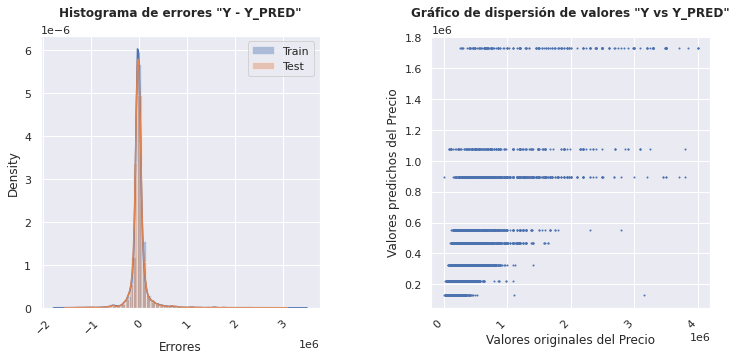

In [44]:
evaluacion_modelo(X_train, X_test, y_train, y_test, tree_inicial)

*Se puede observar que en comparación con el modelo Banchmark conseguimos disminuir el valor de error RMSE, y también aumentó el valor del indicador R2, lo que nos está diciendo que este modelo de árbol inicial es un mejor regreso.*  
*Cuando analizamos los gráficos, vemos que la dispersión de los valores "Y - Y_PRED" sigue siendo significativa, y la gráfica no es simétrica en 0. Mientras que para los valores "Y vs Y_PRED" todavía continúan alejados de la diagonal.*


*Probamos ahora encontrar ese valor de profundidad adecuado para un modelo de Árbol, con el cual obtendremos el valor más bajo de RMSE para nuestros datos.*

Text(0.5, 1.0, 'Curva de Validación')

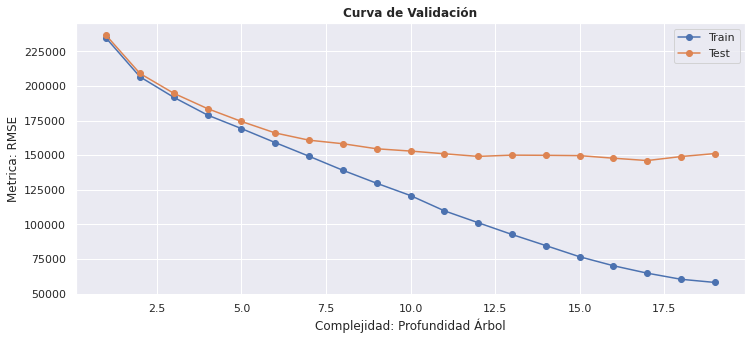

In [45]:
# Definimos las listas vacias para los valores de error
lista_err_train = []
lista_err_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = np.arange(1,20)

# Generamos un loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    # Genero y entreno el modelo
    tree = DecisionTreeRegressor(max_depth = max_depth, random_state = 42)
    tree.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = tree.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = tree.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_err_train.append(train_rmse)
    lista_err_test.append(test_rmse)
    
plt.figure(figsize = (12,5))
plt.plot(max_depths, lista_err_train,'o-',label='Train' )
plt.plot(max_depths, lista_err_test,'o-',label='Test')
plt.legend()
plt.xlabel('Complejidad: Profundidad Árbol')
plt.ylabel('Metrica: RMSE')
#plt.xlim(10, 20)
plt.title('Curva de Validación', fontweight = "black")

*De la Curva de Validación podemos observar que la profundidad del Árbol igual a 17 produce el menor error RMSE para nuestro dataset de Test. Este es el valor óptimo que elegimos.*

*Antes de seguir profundizando, realicemos el mismo análisis pero para nuestro modelo de Vecinos inicial (considerando 5 vecinos), y luego encontremos el número de vecinos óptimos.*  
*Evaluando el modelo de Vecinos inicial vemos que:*


Modelo a evaluar: KNeighborsRegressor()


Raíz del error cuadrático medio en Train: 121300.24049431273
Raíz del error cuadrático medio en Test: 155040.1332898459


Error R Cuadrado en Train: 0.8337576939918325
Error R Cuadrado en Test: 0.7369544202301519




/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


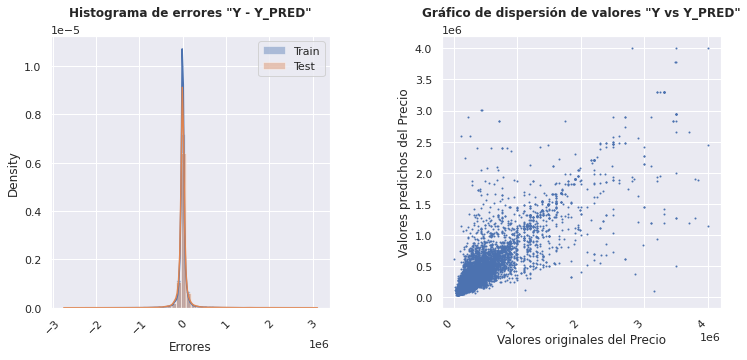

In [46]:
evaluacion_modelo(X_train, X_test, y_train, y_test, knn_inicial)

*Este modelo en comparación con el Benchemark, e incluso con el modelo de Árbol inicial, es bastante mejor modelo.*  
*El valor de RMSE disminuye comparado con los 2 modelos anteriores, y el R2 es el más elevado que hemos conseguido hasta el momento, esto nos da un indicio que hemos encontrado con un modelo que se ajusta bastante bien a los datos.*  
*Analizando la dispersión de los errores "Y - Y_PRED" vemos que todavía existe una gran dispersión, pero la grafica ya es simétrica. Por otro lado, al comparar los valores "Y vs Y_PRED" podemos notar como los puntos están mucho mejor ubicados a la diagonal en comparación de los modelos anteriores*


*Analicemos ahora cuál sería esa valor de cantidad de vecinos a considerar en el modelo, que harían obtener el valor RMSE de error más bajo.*

Text(0.5, 1.0, 'Curva de Validación')

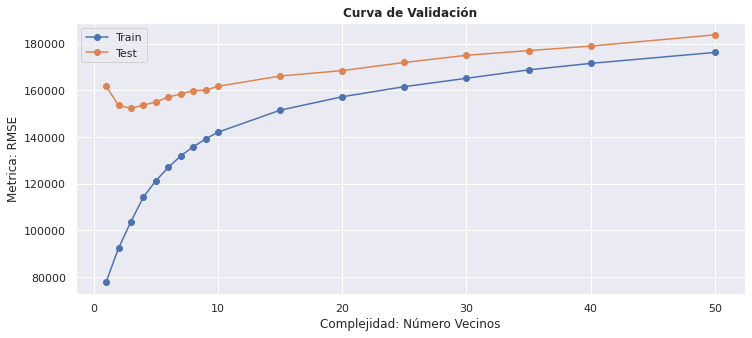

In [47]:
# Definimos las listas vacias para los valores de error
lista_err_train = []
lista_err_test = [] 

# Definimos la lista de valores de k que vamos a explorar 
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50] 

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors= k)
    
    # Entrenar el modelo 
    clf.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_err_train.append(train_rmse)
    lista_err_test.append(test_rmse)

plt.figure(figsize = (12,5))
plt.plot(k_vecinos, lista_err_train,'o-',label='Train' )
plt.plot(k_vecinos, lista_err_test,'o-',label='Test')
plt.legend()
plt.xlabel('Complejidad: Número Vecinos')
plt.ylabel('Metrica: RMSE')
#plt.xlim(0, 10)
plt.title('Curva de Validación', fontweight = "black")

*De la Curva de Validación podemos observar que la cantidad de vecinos a considerar igual a 3 produce el menor error RMSE para nuestro dataset de Test. Este es el valor óptimo que elegimos.*

***Análisis de modelos con parámetros Óptimos***  
*Ahora realicemos el modela para Árbol con una profundidad de 17*


Modelo a evaluar: DecisionTreeRegressor(max_depth=17, random_state=42)


Raíz del error cuadrático medio en Train: 64721.0697732051
Raíz del error cuadrático medio en Test: 146092.75848556007


Error R Cuadrado en Train: 0.9526729314607341
Error R Cuadrado en Test: 0.7664391103044594




/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


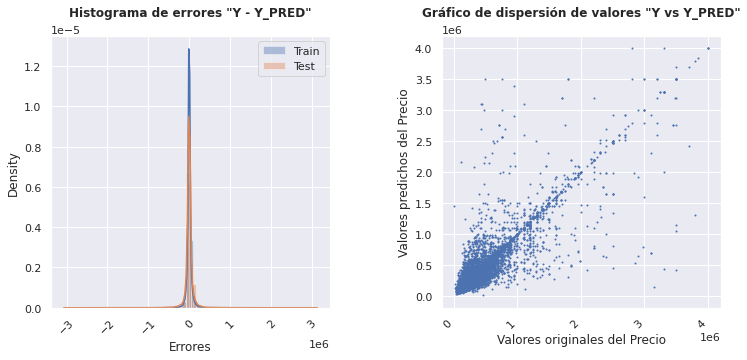

In [48]:
tree_op = DecisionTreeRegressor(max_depth=17, random_state=42)

evaluacion_modelo(X_train, X_test, y_train, y_test, tree_op)

*Se puede observar que:*
- *el valor de RMSE es el más bajo obtenido hasta este momento*
- *el valor de R2 es el más alto obtenido, esto nos indica que nuestro modelo está ajustando bastante bien con nuestro dataset*
- *en la gráfica de dispersión de error vemos que las dispersión sigue siendo considerable, pero la gráfica es simétrica como es deseable*
- *al ver los valores de "Y vs Y_PRED" se puede observar claramente como tenemos más cantidad de valores ubicados sobre la diagonal.*


*Modelemos ahora Vecinos, usando una cantidad de 3 vecinos cercanos*

Modelo a evaluar: KNeighborsRegressor(n_neighbors=3)


Raíz del error cuadrático medio en Train: 103804.20852724434
Raíz del error cuadrático medio en Test: 152317.82229037234


Error R Cuadrado en Train: 0.8782558355018295
Error R Cuadrado en Test: 0.7461108240704453




/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


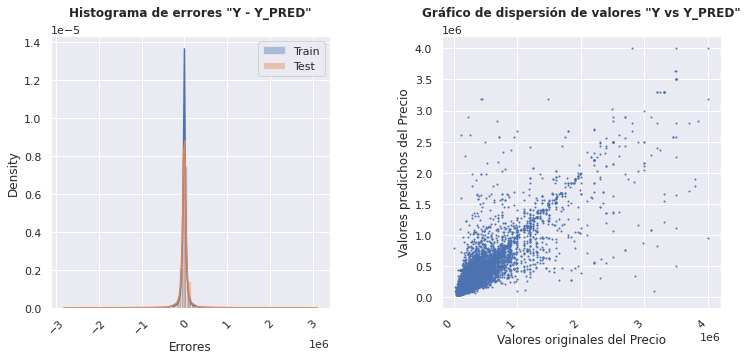

In [49]:
knn_op = KNeighborsRegressor(n_neighbors=3)

evaluacion_modelo(X_train, X_test, y_train, y_test, knn_op)

*Se puede observar que:*
- *el valor de RMSE es levemente más bajo que el obtenido en el modelo Vecinos inicial*
- *de igual modo, el valor de R2 es levemente más alto que el obtenido en el modelo de Vecinos inicial. Más allá de esto, podemos decir que este modelo está ajustando bastante bien con nuestro dataset*
- *en la gráfica de dispersión de error vemos que las dispersión sigue siendo considerable, pero la gráfica es simétrica como es deseable*
- *al ver los valores de "Y vs Y_PRED" se puede observar como tenemos más cantidad de valores ubicados sobre la diagonal, comparado con nuestro modelo Vecinos inicial.*


***Conclusiones Generales***

In [50]:
con = {"Modelo":["Benchmark", "Árbol de decisión Inicial", "Vecinos más cercanos Inicial", "Árbol de decisión Optimo", "Vecinos más cercanos Optimo"], 
           "Hiper-parámetros":["-", "profundidad máxima = 3", "número de vecinos = 5", "profundidad máxima = 17", "número de vecinos = 3"], 
           "RMSE (test)":["~268000", "~194000", "~155000", "~146000", "~152000"], "R2 (test)":["0.22991", "0.58521", "0.73695", "0.76643", "0.74611"]}
pd.DataFrame(con)

,Modelo,Hiper-parámetros,RMSE (test),R2 (test)
0,Benchmark,-,~268000,0.22991
1,Árbol de decisión Inicial,profundidad máxima = 3,~194000,0.58521
2,Vecinos más cercanos Inicial,número de vecinos = 5,~155000,0.73695
3,Árbol de decisión Optimo,profundidad máxima = 17,~146000,0.76643
4,Vecinos más cercanos Optimo,número de vecinos = 3,~152000,0.74611


- *con todos los modelos generados conseguimos un mejor rendimiento en comparación con el modelo Banchmark.*
- *tanto para modelo Árbol, como para Vecinos, se consigue mejor valor RMSE y R2 con los parámetros optimizados.*
- *cuanto mejor el valor RMSE y R2, los valores de error ("Y - Y_PRED") se distribuyen en una gráfica simétrica alrededor de 0, pero se observa en todos los caso una dispersión alta de estos puntos.*
- *cuanto mejor el valor RMSE y R2, los valores de "Y vs Y_PRED" comienzan a ocupar mejor la diagonal de grafico.*
- *el mejor modelo conseguido fue usando un Árbol de decisión, considerando una profundidad igual a 17.*


*Con el análisis realizado hasta el momento, elegiría el modelo que menor RMSE generó, que es un Árbol de Decisión, con una profundidad de 17.*  
*Para futuras mejoras, considero que habría que seguir profundizando en bajar el valor de RMSE, y por lo tanto aumentar R2. Por lo observado en el Análisis Exploratorio de los datos, el valor de los Precios de las propiedades está fuertemente relacionado al Barrio en donde está ubicada. Considero que creer una variable que relacione Precio vs Barrio podría servir mucho para mejorar el modelado.*


---

# Análisis Adicional

---

***Modelar por Tipo de Propiedades***  

*Veamos que sucede con los valores de RMSE y R2 si:*
- *modelemos para cada Tipo de Propiedad por separado*
- *optimizamos los parámetros para un modelo de Árbol de Decisión*


In [21]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
df_m = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
#print(df_d.shape)

# Seleccionamos publicaciones del tipo "Departamento", "Casa" y "PH", que esten en "Capital Federal"
df_m = df_m[((df_m.property_type == 'Departamento') | (df_m.property_type == 'Casa') | (df_m.property_type == 'PH')) & (df_m.l2 == 'Capital Federal')]
#print(df_m.shape)

# Seleccionamos propiedades donde: 15 < superficie total < 1000
df_m = df_m[(df_m.surface_total >= 15) & (df_m.surface_total <= 1000)]
#print(df_m.shape)

# Seleccionamos propiedades donde: precio < 4000000
df_m = df_m[(df_m.price <= 4000000)]
#print(df_m.shape)

# Elegimos solo 6 columnas del dataset
df_m = df_m[["property_type","rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]]

# Eliminamos valores nulo del dataset
df_m = df_m.dropna().reset_index(drop=True)

#print(df_m.shape)


print('Tamaño de nuestro Dataset: ' + str(df_m.shape))

# Para Depaartamento ---------------------------------------------------------------------------
X_m = df_m[df_m.property_type == 'Departamento']
X_m = X_m.drop(['price', 'property_type'], axis=1)
y_m = df_m[df_m.property_type == 'Departamento']
y_m = np.ravel(y_m[['price']])

#print(X_m.shape)
#print(y_m.shape)
print('Tamaño Dataset para Departamentos: ' + str(X_m.shape))

# Separamos el dataset, dejamos 30% de las muestras para testear
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_m, y_m, test_size = 0.3, random_state = 42)

# ------------------------------------------------------------------------------------------------

# Para PH ---------------------------------------------------------------------------
X_m = df_m[df_m.property_type == 'PH']
X_m = X_m.drop(['price', 'property_type'], axis=1)
y_m = df_m[df_m.property_type == 'PH']
y_m = np.ravel(y_m[['price']])

#print(X_m.shape)
#print(y_m.shape)
print('Tamaño Dataset para PH: ' + str(X_m.shape))

# Separamos el dataset, dejamos 30% de las muestras para testear
X_train_ph, X_test_ph, y_train_ph, y_test_ph = train_test_split(X_m, y_m, test_size = 0.3, random_state = 42)

# ------------------------------------------------------------------------------------------------

# Para Casa ---------------------------------------------------------------------------
X_m = df_m[df_m.property_type == 'Casa']
X_m = X_m.drop(['price', 'property_type'], axis=1)
y_m = df_m[df_m.property_type == 'Casa']
y_m = np.ravel(y_m[['price']])

#print(X_m.shape)
#print(y_m.shape)
print('Tamaño Dataset para Casa: ' + str(X_m.shape))

# Separamos el dataset, dejamos 30% de las muestras para testear
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_m, y_m, test_size = 0.3, random_state = 42)

# ------------------------------------------------------------------------------------------------

Tamaño de nuestro Dataset: (81019, 7)
Tamaño Dataset para Departamentos: (69313, 5)
Tamaño Dataset para PH: (9564, 5)
Tamaño Dataset para Casa: (2142, 5)


Text(0.5, 1.0, 'Curva de Validación para Casa')

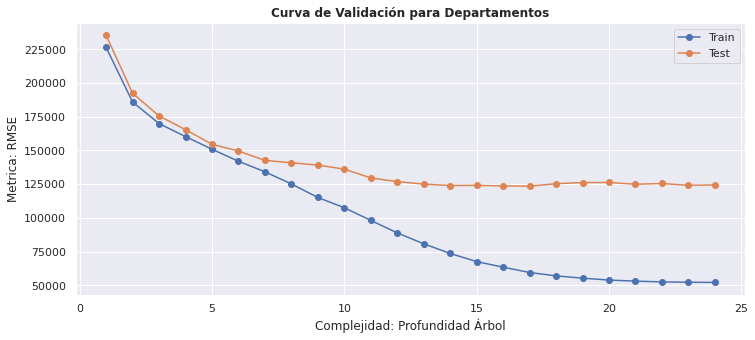

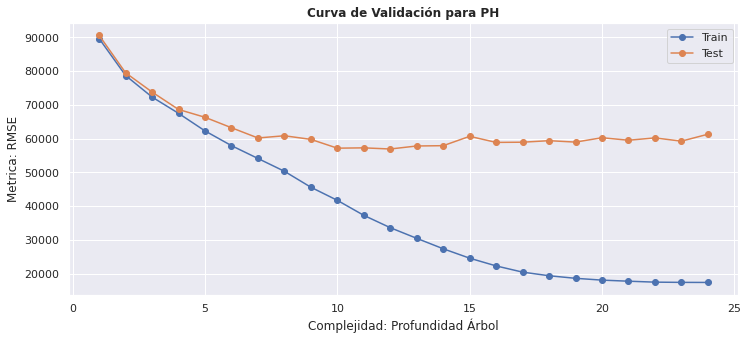

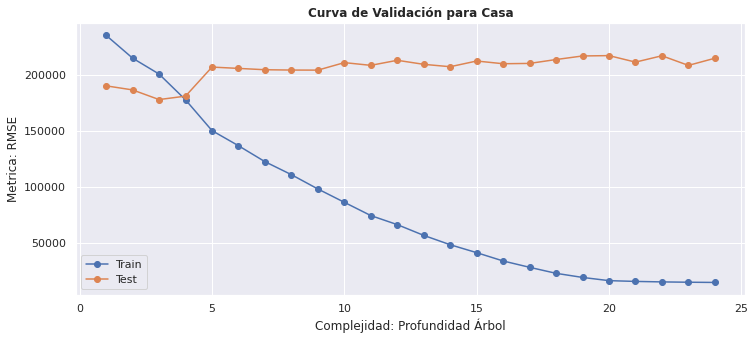

In [37]:
# Definimos las listas vacias para los valores de error
lista_err_train = []
lista_err_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = np.arange(1,25)

# Generamos un loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    # Genero y entreno el modelo
    tree = DecisionTreeRegressor(max_depth = max_depth, random_state = 42)
    tree.fit(X_train_d, y_train_d)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred_d = tree.predict(X_train_d)
    train_rmse = np.sqrt(mean_squared_error(y_train_d, y_train_pred_d))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_d = tree.predict(X_test_d)
    test_rmse = np.sqrt(mean_squared_error(y_test_d, y_test_pred_d))
    
    # Agregar la información a las listas
    lista_err_train.append(train_rmse)
    lista_err_test.append(test_rmse)
    
plt.figure(figsize = (12,5))
plt.plot(max_depths, lista_err_train,'o-',label='Train' )
plt.plot(max_depths, lista_err_test,'o-',label='Test')
plt.legend()
plt.xlabel('Complejidad: Profundidad Árbol')
plt.ylabel('Metrica: RMSE')
#plt.xlim(15, 25)
plt.title('Curva de Validación para Departamentos', fontweight = "black")

#-------------------------------------------------------------------------------------------
lista_err_train = []
lista_err_test = []

for max_depth in max_depths:
    # Genero y entreno el modelo
    tree = DecisionTreeRegressor(max_depth = max_depth, random_state = 42)
    tree.fit(X_train_ph, y_train_ph)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred_ph = tree.predict(X_train_ph)
    train_rmse = np.sqrt(mean_squared_error(y_train_ph, y_train_pred_ph))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_ph = tree.predict(X_test_ph)
    test_rmse = np.sqrt(mean_squared_error(y_test_ph, y_test_pred_ph))
    
    # Agregar la información a las listas
    lista_err_train.append(train_rmse)
    lista_err_test.append(test_rmse)
    
plt.figure(figsize = (12,5))
plt.plot(max_depths, lista_err_train,'o-',label='Train' )
plt.plot(max_depths, lista_err_test,'o-',label='Test')
plt.legend()
plt.xlabel('Complejidad: Profundidad Árbol')
plt.ylabel('Metrica: RMSE')
#plt.xlim(9, 15)
plt.title('Curva de Validación para PH', fontweight = "black")

#-------------------------------------------------------------------------------------------
lista_err_train = []
lista_err_test = []

for max_depth in max_depths:
    # Genero y entreno el modelo
    tree = DecisionTreeRegressor(max_depth = max_depth, random_state = 42)
    tree.fit(X_train_c, y_train_c)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred_c = tree.predict(X_train_c)
    train_rmse = np.sqrt(mean_squared_error(y_train_c, y_train_pred_c))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_c = tree.predict(X_test_c)
    test_rmse = np.sqrt(mean_squared_error(y_test_c, y_test_pred_c))
    
    # Agregar la información a las listas
    lista_err_train.append(train_rmse)
    lista_err_test.append(test_rmse)
    
plt.figure(figsize = (12,5))
plt.plot(max_depths, lista_err_train,'o-',label='Train' )
plt.plot(max_depths, lista_err_test,'o-',label='Test')
plt.legend()
plt.xlabel('Complejidad: Profundidad Árbol')
plt.ylabel('Metrica: RMSE')
#plt.xlim(15, 25)
plt.title('Curva de Validación para Casa', fontweight = "black")

Modelo a evaluar: DecisionTreeRegressor(max_depth=16, random_state=42)


Raíz del error cuadrático medio en Train: 63488.748440335905
Raíz del error cuadrático medio en Test: 123716.17230262516


Error R Cuadrado en Train: 0.9588431952670334
Error R Cuadrado en Test: 0.8520022671550926




/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


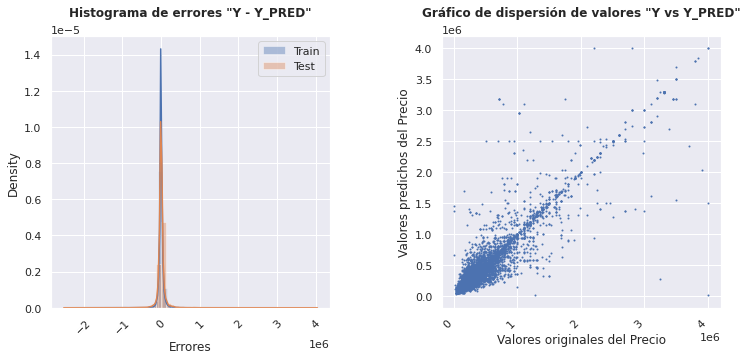

In [35]:
tree_op = DecisionTreeRegressor(max_depth=16, random_state=42)
evaluacion_modelo(X_train_d, X_test_d, y_train_d, y_test_d, tree_op)

Modelo a evaluar: DecisionTreeRegressor(max_depth=10, random_state=42)


Raíz del error cuadrático medio en Train: 41699.09853260045
Raíz del error cuadrático medio en Test: 57167.85859526617


Error R Cuadrado en Train: 0.871360580542336
Error R Cuadrado en Test: 0.7558039398588334




/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


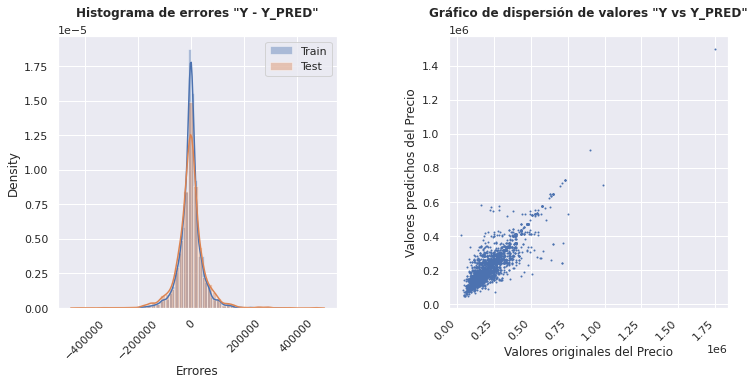

In [39]:
tree_op = DecisionTreeRegressor(max_depth=10, random_state=42)
evaluacion_modelo(X_train_ph, X_test_ph, y_train_ph, y_test_ph, tree_op)

Modelo a evaluar: DecisionTreeRegressor(max_depth=3, random_state=42)


Raíz del error cuadrático medio en Train: 200986.71730481336
Raíz del error cuadrático medio en Test: 178133.4328793778


Error R Cuadrado en Train: 0.47504626278625284
Error R Cuadrado en Test: 0.42802485808891777




/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


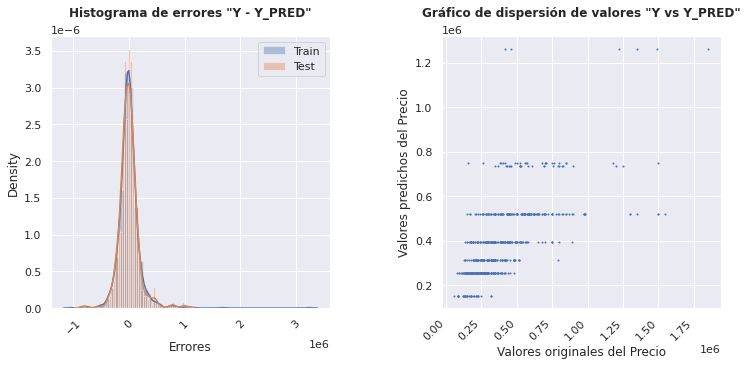

In [42]:
tree_op = DecisionTreeRegressor(max_depth=3, random_state=42)
evaluacion_modelo(X_train_c, X_test_c, y_train_c, y_test_c, tree_op)

***Conclusiones***
- *analizando solo Departamentos, conseguimos un modelo menos complejo (profundidad de 16), mejoramos el valor de RMSE e incrementamos el valor de R2. Si bien la dispersión de los errores sigue siendo considerable, los valores son simétricos alrededor de 0, y los puntos de "Y vs Y_PRED" intentan ubicarse en la diagonal del gráfico.*  ***Este modelo se ajusta mejor a los datos***, en comparación a los modelos óptimos calculados anteriormente.*
- *analizando solo PH, conseguimos un modelo menos complejo (profundidad de 10), mejoramos el valor de RMSE pero no así el valor de R2. Si bien la dispersión de los errores es bastante menor y los valores son simétricos alrededor de 0, los puntos de "Y vs Y_PRED" intentan ubicarse en la diagonal del gráfico, ***este modelo no se ajusta tanto*** en comparación a los modelos óptimos calculados anteriormente.*
- *analizando solo Casa, conseguimos un modelo menos complejo (profundidad de 3), pero no mejoramos el valor de RMSE, ni tampoco el valor de R2. La dispersión de los errores sigue siendo considerable, los valores son simétricos alrededor de 0, y los puntos de "Y vs Y_PRED" no siguen muy bien la diagonal del gráfico.*  ***Este modelo no se ajusta tanto*** en comparación a los modelos óptimos calculados anteriormente.*
